In [10]:
! pip install nnfs

  Obtaining dependency information for nnfs from https://files.pythonhosted.org/packages/06/8c/3003a41d5229e65da792331b060dcad8100a0a5b9760f8c2074cde864148/nnfs-0.5.1-py3-none-any.whl.metadata


#### What's the deal with activation function?

Consider the step function:

y = { 1 x > 0
      0 x <= 0 }
      
If the input is greater than 0, output will be 1.
If input is less or equal to 0, output will be 0. 

To use this as an activation, I apply the step function to each neuron. I pass the output of the input(weights) + bias through the step function and the output is either 0 or 1 based on the value of the layer output.

Consider the sigmoid function:

y =  1 / (1 + e^-x)

Easier and more reliable to train a neural network. Main difference compared to step function is that sigmoid gives a more granular output, which allows a little more freedom in the training process. Binary outputs don't tell us how close something was to a certain value. 

Consider the rectified linear unit activation function.

y = { x x > 0
      0 x <= 0 }

Similar to sigmoid, output is granular at a certain point (past zero). This is helpful because sigmoid has a vanishing gradient problem. ReLU is fast, less complex, and just works. 

ReLU is the most popular activation function to apply in hidden layers.

#### Why can't we just tune the network with weights and biases alone? 

This would impose a large series of linear activation functions that cannot approximate nonlinear patterns because the average output would just be a line. Nonlinear activation functions allow greater freedom through averaged output. 

We can increase strength of neuron by increasing the weight and tweak the activation threshold by tweaking the bias. If we negate the weight, now value determines the point at which neuron deactivates. 

When working with multiple neurons, changes to weights and biases move the whole output horizontally/vertically and establish minimums and maximums to form nonlinear patterns (ReLU). The primary goal is to create an manipulate "areas of affect," which represent the dimensional space of the overall ouput function that's affected by pairs of neurons "working" together. The more neurons and layers you have, the more areas of affect and the smoother the nonlinear output will be.

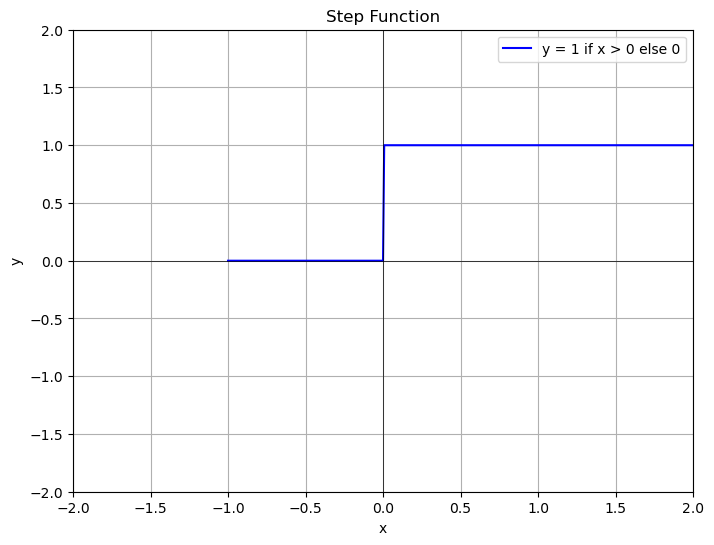

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the step function
def step_function(x):
    return np.where(x > 0, 1, 0)

# Generate x values
x = np.linspace(-1, 2, 400)
y = step_function(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = 1 if x > 0 else 0', color='blue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both')

# Set the x and y axis limits
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Label the plot
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

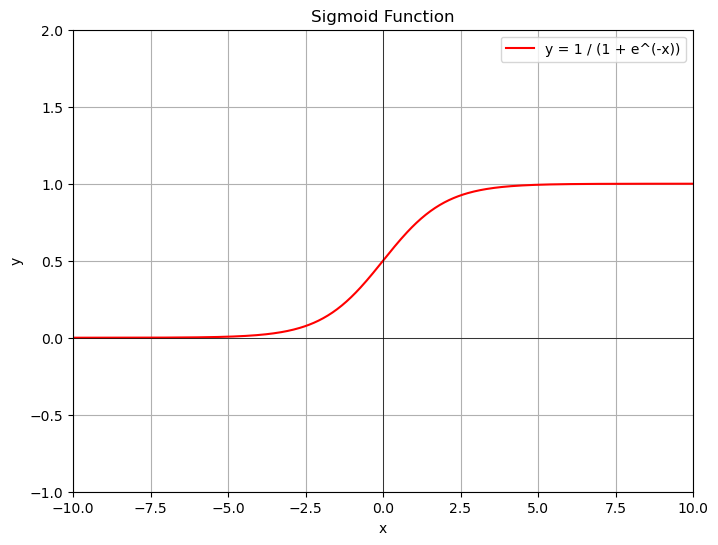

In [5]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = 1 / (1 + e^(-x))', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both')

# Set the x and y axis limits
plt.xlim([-10, 10])
plt.ylim([-1, 2])

# Label the plot
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()


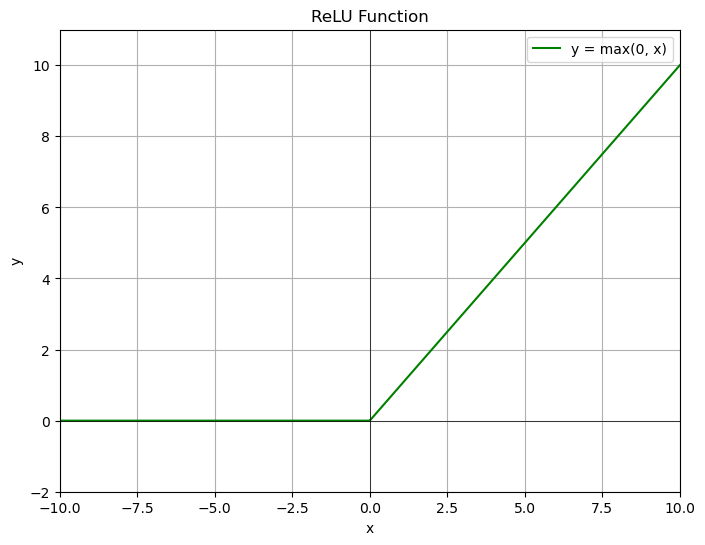

In [6]:
# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values
x = np.linspace(-10, 10, 400)
y = relu(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = max(0, x)', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both')

# Set the x and y axis limits
plt.xlim([-10, 10])
plt.ylim([-2, 11])

# Label the plot
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()


#### Coding activation functions..

In [8]:
inputs = [0,2,-1,3.3,-2.7, 1.1, 2.2, -100]
output = []

# represents ReLU clipping everything at or below 0...

for i in inputs:
    if i > 0:
        output.append(i)
    elif i <= 0:
        output.append(0)
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [9]:
# alternatively to if elif statement...

inputs = [0,2,-1,3.3,-2.7, 1.1, 2.2, -100]
output = []

# represents ReLU clipping everything at or below 0...

for i in inputs:
    output.append(max(0,i))
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


#### We want a rectified linear object that can handle forward pass and backward pass.

In [13]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# this data generates a spiral pattern of 3 classes with two predictive features in 100 sets/batches

X, y = spiral_data(100,3)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
            
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

        
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        

layer1 = Layer_Dense(2,5) # create instance of first layer that receives inputs from spiral data 
activation1 = Activation_ReLU() # initialize activation function object

layer1.forward(X) # run the forward pass
activation1.forward(layer1.output) # apply ReLU activation function to the output of the forward pass

print("Layer 1 output: ")
print()
print(layer1.output)
print()
print("Output After Activation Function: ")
print()
print(activation1.output)

Layer 1 output: 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]

Output After Activation Function: 

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000

#### Up next, softmax activation functions - particularly applicable to the output layer.